#  Poisson Noise Filter

In [1]:
//load ImageJ
%classpath config resolver imagej.public https://maven.imagej.net/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: imagej.public


net.imagej.ImageJ@2ca80bca

This filter adds noise to an image based on a Poisson distribution (i.e. not uniform).

The `Op` is called as follows:

In [4]:
ij.op().help('addPoissonNoise')

Available operations:
	(RealType out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseRealType(
		RealType out,
		RealType in,
		long seed?)
	(IterableInterval out) =
	net.imagej.ops.filter.addPoissonNoise.AddPoissonNoiseMap(
		IterableInterval out,
		IterableInterval in)

Here we have an image of tree rings ([Source](http://imagej.net/images/Dot_Blot.jpg)).

[INFO] Populating metadata
[INFO] Populating metadata


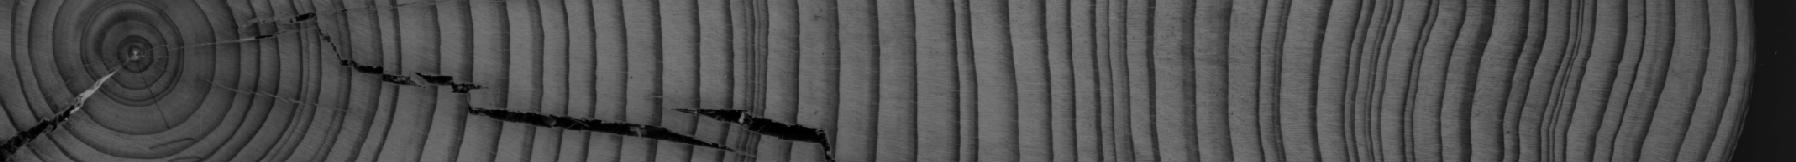

In [5]:
input = ij.scifio().datasetIO().open("https://imagej.net/images/Tree_Rings.jpg")
ij.notebook().display(input)                                     

All we have to do is give the `Op` an output and a input and we are good to go!

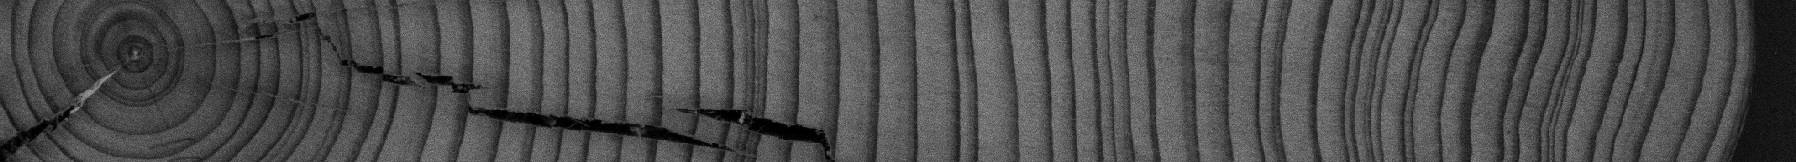

In [7]:
import net.imagej.ops.Ops

//output image
actualOutput = ij.op().create().img(input)

//run a map op over the image using the noise Op above
ij.op().run(Ops.Filter.AddPoissonNoise.class, actualOutput, input)

ij.notebook().display(actualOutput)

And here we have noise. It is a little more difficult to see, so let's run a subtraction `Op` on the two images to see the difference:

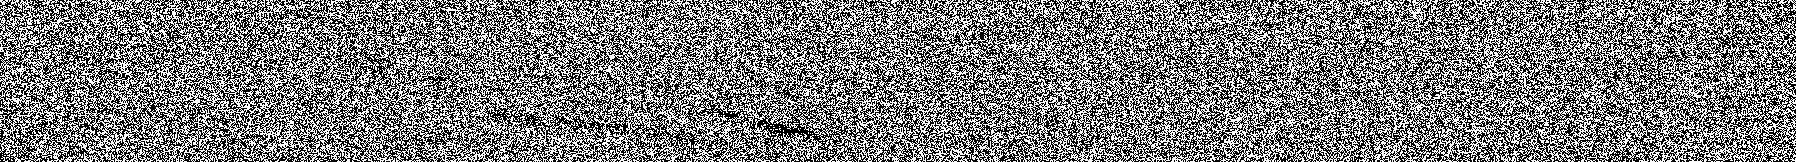

In [9]:
difference = ij.op().create().img(input)

ij.op().run("subtract", difference, actualOutput, input)

ij.notebook().display(difference)

There are other noise `Op`s available in ImageJ-Ops that use different kernels, such as the [Gaussian Noise Op](addNoise.ipynb), that provides noise based on a Gaussian kernel, and the [Uniform Noise Op] (ADD LINK, REMOVE SPACE) that provides uniform noise, which can, among other things, be used to generate random test images.